# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [10, 12]
%matplotlib inline

/home/bingyu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 2
bf_env = bf(init_state, goal, n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, 2*n+1))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.99, eps=0.1, annealing=0.9, replay_buffer_size=100)

In [4]:
losses = agent.train_Q(x, y, episode=200, T=n, update_step=50)

[[ 1.  0.  1.  1.  1. -1.  0.  1.]]
Episode 0: loss is 0.674
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]]
Episode 0: loss is 0.602
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]]
Episode 1: loss is 0.464
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]]
Episode 2: loss is 0.306
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]]
Episode 2: loss is 0.267
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]]
Episode 3: loss is 0.297
[[ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0

Episode 14: loss is 0.109
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]]
Episode 15: loss is 0.109
[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [

[[ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  1.  0. -1.  1.  1.]
 [ 0.  0.  0.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1

Episode 27: loss is 0.0676
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  1.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0

[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0

[[ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0

Episode 41: loss is 0.0393
[[ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1

Episode 45: loss is 0.0414
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0

[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0

Episode 51: loss is 0.467
[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.

Episode 54: loss is 0.182
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.

Episode 57: loss is 0.29
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  0.  1.  1.  0.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0. 

Episode 61: loss is 0.257
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.

Episode 64: loss is 0.111
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.

[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  0.  1.  0

Episode 72: loss is 0.266
[[ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.

Episode 75: loss is 0.184
[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.

[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0

Episode 81: loss is 0.0188
[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0

Episode 85: loss is 0.397
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.

[[ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0

[[ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0

Episode 94: loss is 0.393
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.

Episode 97: loss is 0.19
[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1. 

Episode 100: loss is 0.611
[[ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1

Episode 103: loss is 0.654
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1

[[ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0

Episode 109: loss is 0.796
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1

[[ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1

Episode 115: loss is 0.653
[[ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0

Episode 118: loss is 0.117
[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0

Episode 121: loss is 0.112
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  0.  0.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 124: loss is 0.732
[[ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  0.  0.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 128: loss is 0.415
[[ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 131: loss is 0.415
[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0

Episode 133: loss is 0.229
[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1

[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0

[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0

Episode 141: loss is 0.493
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1

[[ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  0.  0.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1

Episode 145: loss is 0.609
[[ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0

Episode 149: loss is 0.42
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.

Episode 152: loss is 0.362
[[ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 155: loss is 1.11
[[ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  0.  0.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.

Episode 158: loss is 0.44
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.

[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1

Episode 163: loss is 0.368
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 166: loss is 0.982
[[ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 169: loss is 1.04
[[ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.

Episode 172: loss is 0.827
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1

Episode 174: loss is 0.552
[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  0

Episode 177: loss is 0.632
[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1

Episode 181: loss is 1.06
[[ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.

Episode 184: loss is 0.807
[[ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0

Episode 186: loss is 0.275
[[ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0

Episode 190: loss is 1.13
[[ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.

Episode 193: loss is 0.31
[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.

[[ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0

Episode 197: loss is 0.963
[[ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  0.  1.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1

[[ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1. -1.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  0. -1.  0.  0.]
 [ 1.  1.  1.  1.  0. -1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  1.]
 [ 0.  1.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1.  0.  1. -1.  1.  0.]
 [ 1.  1.  1.  1.  0

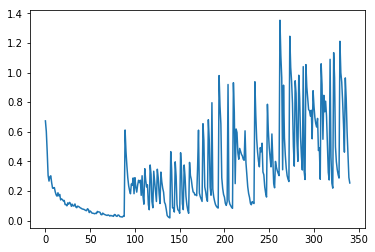

In [5]:
plt.figure()
plt.plot(losses)